In [ ]:
Veri manipülasyonu, görselleştirme ve makine öğrenmesi modelleri için gerekli olan standart
kütüphaneleri içeri aktararak başlıyoruz.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Uyarıları gizlemek için (Opsiyonel ama temiz çıktı için iyidir)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Daha önce temizlediğimiz ve işlemeye hazır hale getirdiğimiz .csv 
dosyasını yüklüyoruz. Ardından hedef değişkenimiz (y) olan RainTomorrow 
sütununu, özniteliklerden (X) ayırıyoruz.

In [8]:
# Veriyi yükle (Dosya yolunun doğru olduğundan emin olun)
data = pd.read_csv('cleaned_weather_vize.csv')

# Hedef değişken (y) ve Öznitelikler (X) ayrımı
X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

print(f"Veri Seti Boyutu: {data.shape}")
print("Öznitelikler ve Hedef değişken ayrıldı.")

Veri Seti Boyutu: (145460, 23)
Öznitelikler ve Hedef değişken ayrıldı.


In [ ]:
Modelimizin performansını doğru ölçebilmek için veriyi ikiye bölüyoruz. 
Verinin %80'ini modelin öğrenmesi (train), %20'sini ise modelin hiç 
görmediği veriler üzerinde test edilmesi (test) için ayırıyoruz.

In [9]:
# Veriyi %80 Eğitim, %20 Test olacak şekilde ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim Seti Boyutu: {X_train.shape}")
print(f"Test Seti Boyutu: {X_test.shape}")

Eğitim Seti Boyutu: (116368, 22)
Test Seti Boyutu: (29092, 22)


In [1]:
Logistic Regression gibi doğrusal modeller, verilerin ölçeğine karşı hassastır. Örneğin, 
basınç değeri (1000+) ile yağmur miktarı (0-10) arasındaki uçurumu kapatmak için verileri 
standartlaştırıyoruz (Ortalama=0, Varyans=1).

Not: scaler sadece eğitim setine fit edilir, test setine sadece transform uygulanır.

SyntaxError: invalid syntax (180304663.py, line 1)

In [10]:
scaler = StandardScaler()

# Eğitim setine göre ölçeği öğrenip dönüştürüyoruz
X_train_scaled = scaler.fit_transform(X_train)

# Test setini, eğitim setinden öğrendiğimiz ölçeğe göre dönüştürüyoruz
X_test_scaled = scaler.transform(X_test)

In [2]:
Lojistik Regresyon modelini başlatıyoruz. max_iter=1000 parametresini, 
modelin karmaşık verilerde yakınsaması (converge) için iterasyon sayısını 
artırmak amacıyla ekledik.

SyntaxError: invalid syntax (1619955708.py, line 1)

In [11]:
print("Model Eğitiliyor: Logistic Regression...")

# Modeli tanımla
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Modeli ölçeklenmiş eğitim verisiyle eğit
log_model.fit(X_train_scaled, y_train)

print("Eğitim tamamlandı.")

Model Eğitiliyor: Logistic Regression...
Eğitim tamamlandı.


In [ ]:
Model eğitildikten sonra test seti üzerinde tahminler yapıyoruz. Başarıyı ölçmek için Accuracy (Doğruluk), 
Classification Report (F1-Score, Recall vb.) ve Confusion Matrix (Karmaşıklık Matrisi) kullanıyoruz.

In [12]:
# Test seti üzerinde tahmin yap
y_pred = log_model.predict(X_test_scaled)

print("\n--- Logistic Regression Sonuçları ---")
print(f"Accuracy (Doğruluk): {accuracy_score(y_test, y_pred):.4f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


--- Logistic Regression Sonuçları ---
Accuracy (Doğruluk): 0.8425

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.72      0.47      0.57      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [ ]:
Sayısal raporlar bazen gözden kaçabilir. Modelin hangi sınıfları karıştırdığını görmek için 
Karmaşıklık Matrisini (Confusion Matrix) ısı haritası (heatmap) olarak çizdiriyoruz.

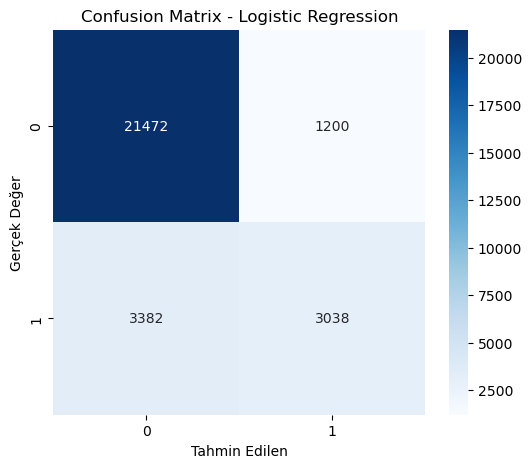

In [13]:
# Görsel: Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

In [ ]:
Lojistik Regresyon kodumuz; ham hava durumu verilerini alır, onları eşit şartlara getirir (scaling), 
her bir faktörün yağmur üzerindeki etkisini hesaplar (training) ve sonunda matematiksel bir olasılık 
hesabı yaparak bize "Şemsiyeni al" ya da "Alma" tavsiyesinde bulunur.

Model Eğitiliyor: Logistic Regression...

--- Logistic Regression Sonuçları ---
Accuracy: 0.8473
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22717
           1       0.73      0.49      0.58      6375

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



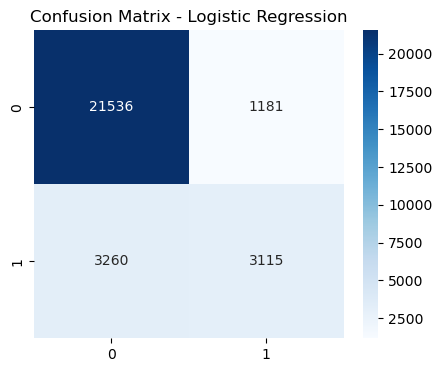

In [1]:
"""
# --- YUSUF_RIDVAN_CELIKBAS_22040101055_TeamShinningStars.ipynb ---
# Algoritma: Logistic Regression

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Temiz Veriyi Yükle
df = pd.read_csv('cleaned_weather_vize.csv')

# Güvenlik Kontrolü: RISK_MM varsa sil
if 'RISK_MM' in df.columns:
    df.drop('RISK_MM', axis=1, inplace=True)

# 2. Veri Ayırma
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

# Train-Test Split (%80 Eğitim, %20 Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Eğitimi
print("Model Eğitiliyor: Logistic Regression...")
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

# 5. Tahmin ve Sonuçlar
y_pred = log_model.predict(X_test_scaled)

print("\n--- Logistic Regression Sonuçları ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Görsel: Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show() 
"""